In [6]:
# 농수축 & 이미용 EDA
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.rcParams['font.family'] = 'Malgun Gothic'


In [7]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    df = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/base_line.xlsx', header=0)
else:
    print('Not running on CoLab')
    df = pd.read_excel('c:/bc/base_line.xlsx', header=0)

Not running on CoLab


In [15]:
def group_df(group_name):
    return df[df.p_group == group_name]

def box_plot(group_name):
    times = ['MONTH','DAY_NUM','HOUR']
    features = ['total_price','sales','unit_price']
    nrows = ncols = 3  

    fig, axes = plt.subplots(nrows,ncols, figsize = (18,18))

    for row, time in enumerate(times):
        for col ,feature in enumerate(features):

            g = sns.boxplot(x=time, y=feature, data=group_df(group_name), ax=axes[row,col])

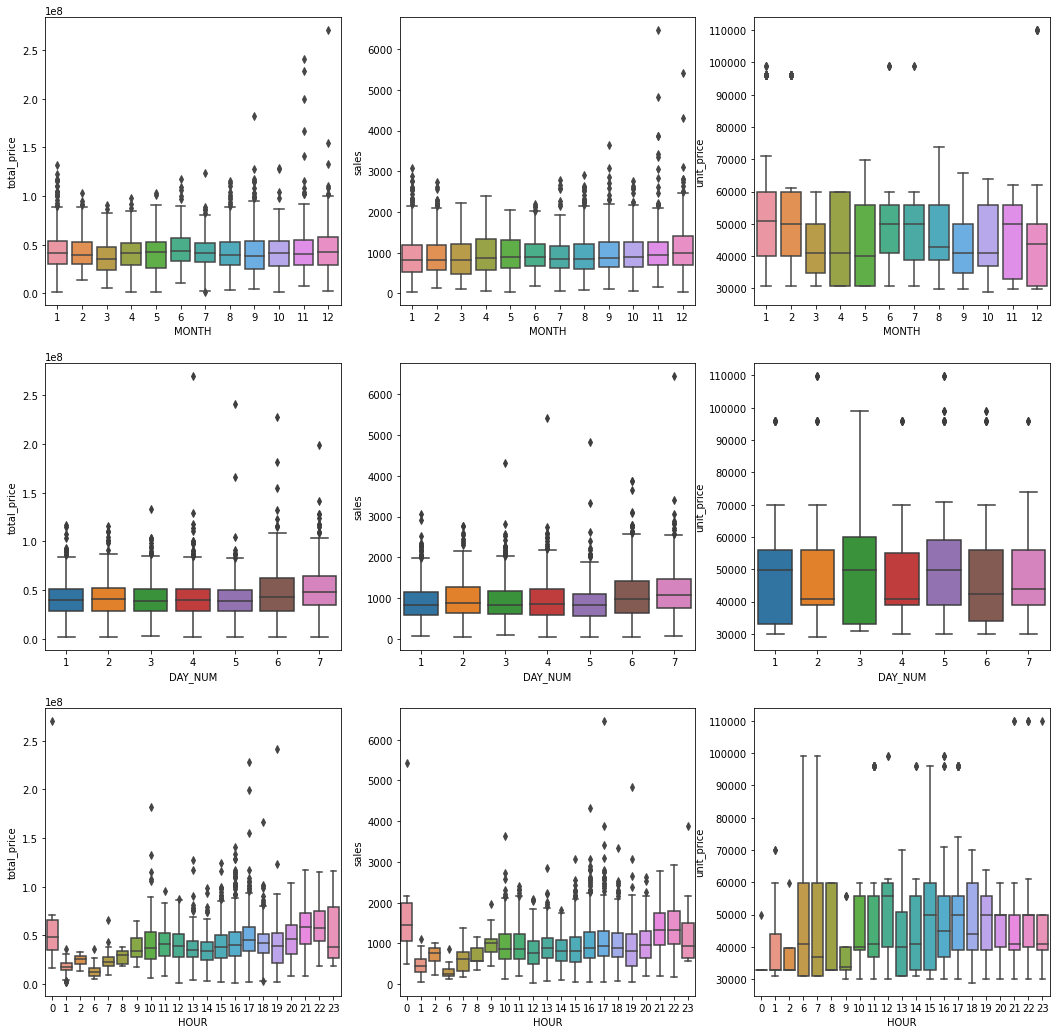

In [16]:
box_plot('농수축')

In [34]:
#상품군 별 월, 시간대, 요일별 방송 횟수 count
def monthly_time_weekday_broad_count(p_group_name):
    figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
    figure.set_size_inches(15,5)

    month = df[df.p_group==p_group_name].groupby('MONTH')['unit_price'].count()
    hour = df[df.p_group==p_group_name].groupby('HOUR')['unit_price'].count()
    day_name = df[df.p_group==p_group_name].groupby('DAY_NAME')['unit_price'].count()

    sns.barplot(x=month.index, y=month.values, ax=ax1)
    sns.barplot(x=hour.index, y=hour.values, ax=ax2)
    sns.barplot(x=day_name.index, y=day_name.values, ax=ax3)

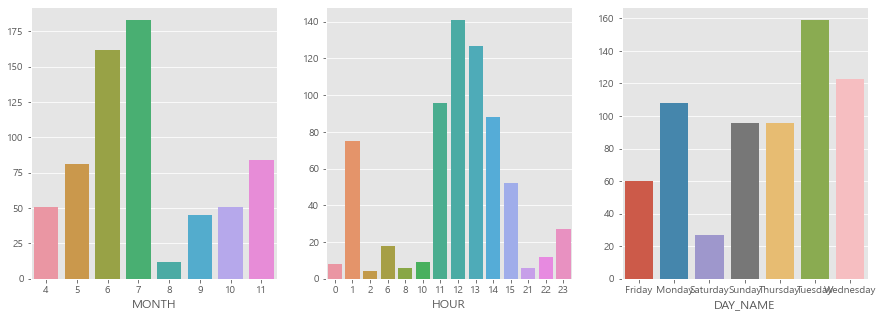

In [35]:
monthly_time_weekday_broad_count('침구')

In [36]:
# 특정 상품군의 월별 unit_price,total_price,sales(mean, sum)
def kinds_sum_mean(form,arg):
    figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
    figure.set_size_inches(20,10)

    m_data_sum = df[df['p_group'] == arg].groupby(form).sum()['unit_price']
    h_data_sum = df[df['p_group'] == arg].groupby(form).sum()['total_price']
    d_data_sum = df[df['p_group'] == arg].groupby(form).sum()['sales']

    m_data_mean = df[df['p_group'] == arg].groupby(form).mean()['unit_price']
    h_data_mean = df[df['p_group'] == arg].groupby(form).mean()['total_price']
    d_data_mean = df[df['p_group'] == arg].groupby(form).mean()['sales']

    sns.pointplot(x = m_data_sum.index, y = m_data_sum.values, ax = ax1)
    sns.pointplot(x = h_data_sum.index, y = h_data_sum.values, ax = ax3)
    sns.barplot(x = d_data_sum.index, y = d_data_sum.values, ax = ax5)
    
    sns.pointplot(x = m_data_mean.index, y = m_data_mean.values, ax = ax2)
    sns.pointplot(x = h_data_mean.index, y = h_data_mean.values, ax = ax4)
    sns.barplot(x = d_data_mean.index, y = d_data_mean.values, ax = ax6)
    
    ax1.set(title='sum')
    ax2.set(title='mean')

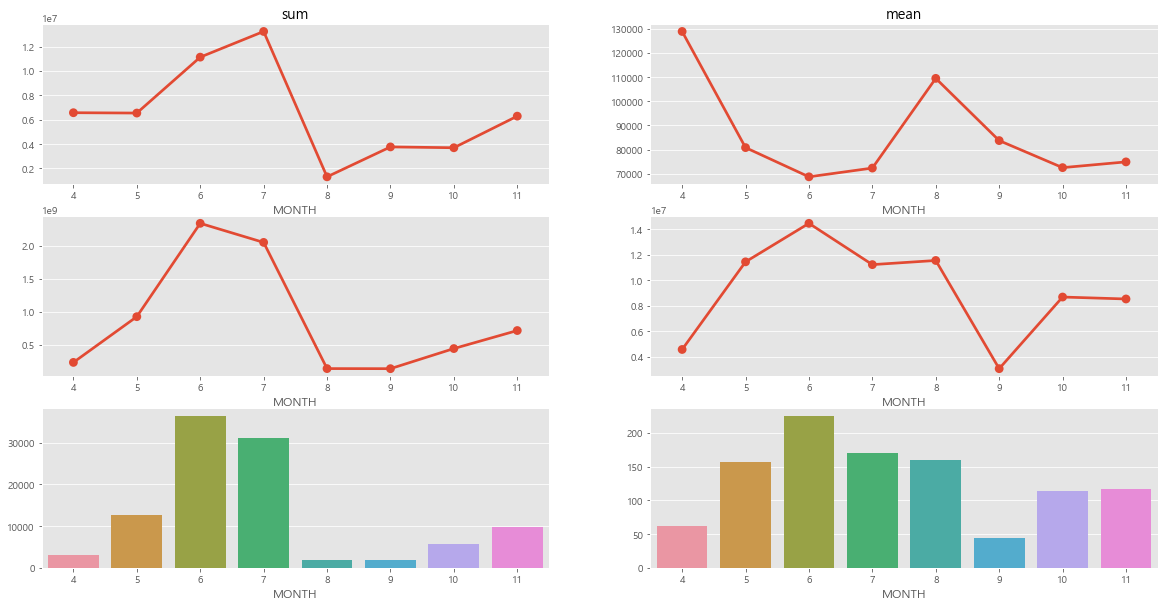

In [39]:
kinds_sum_mean('MONTH','침구') # MONTH, HOUR, DAY_NAME중 선택